In [27]:
import pandas as pd
import numpy as np
import tqdm
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

pd.set_option("max_rows", 200)
pd.set_option("max_columns", 50)
tqdm.tqdm.pandas()
%matplotlib inline

In [28]:
df = pd.read_csv("034_contentid9315/9315.csv")

In [29]:
df["content_rating"]

0       1561
1       1561
2       1561
3       1561
4       1561
        ... 
1478    1561
1479    1561
1480    1561
1481    1561
1482    1561
Name: content_rating, Length: 1483, dtype: int64

In [30]:
df["user_id_rating"].describe()

count    1483.000000
mean     1589.462576
std        96.179729
min      1132.000000
25%      1517.000000
50%      1560.000000
75%      1660.500000
max      1969.000000
Name: user_id_rating, dtype: float64

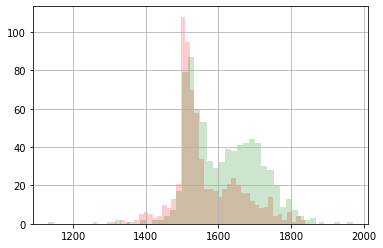

In [34]:
df[df["answered_correctly"]==0]["user_id_rating"].hist(bins=50, alpha=0.2, color="red")
df[df["answered_correctly"]==1]["user_id_rating"].hist(bins=50, alpha=0.2, color="green")

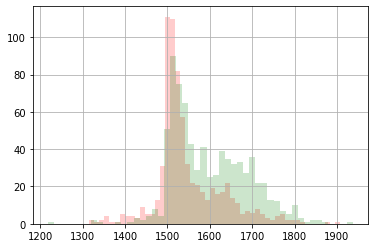

In [35]:
df[df["answered_correctly"]==0]["__user_id____part___rating"].hist(bins=50, alpha=0.2, color="red")
df[df["answered_correctly"]==1]["__user_id____part___rating"].hist(bins=50, alpha=0.2, color="green")

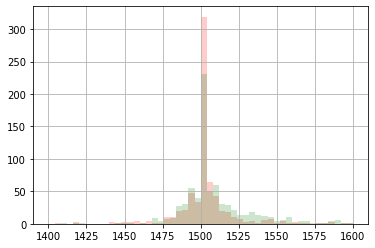

In [36]:
df[df["answered_correctly"]==0]["__user_id____tags1___rating"].hist(bins=50, alpha=0.2, range=(1400, 1600), color="red")
df[df["answered_correctly"]==1]["__user_id____tags1___rating"].hist(bins=50, alpha=0.2, range=(1400, 1600), color="green")

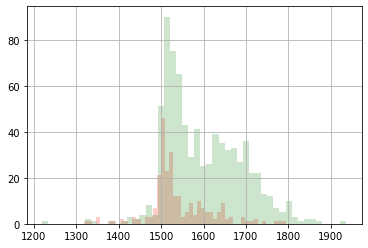

In [37]:
df[df["user_answer"]==0]["__user_id____part___rating"].hist(bins=50, alpha=0.2, color="red")
df[df["user_answer"]==3]["__user_id____part___rating"].hist(bins=50, alpha=0.2, color="green")

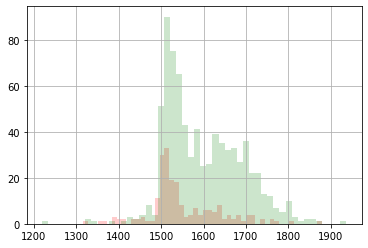

In [38]:
df[df["user_answer"]==1]["__user_id____part___rating"].hist(bins=50, alpha=0.2, color="red")
df[df["user_answer"]==3]["__user_id____part___rating"].hist(bins=50, alpha=0.2, color="green")

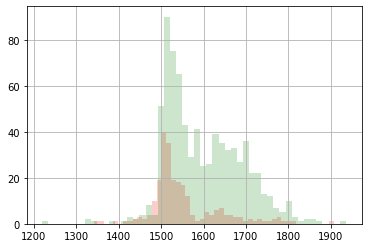

In [39]:
df[df["user_answer"]==2]["__user_id____part___rating"].hist(bins=50, alpha=0.2, color="red")
df[df["user_answer"]==3]["__user_id____part___rating"].hist(bins=50, alpha=0.2, color="green")

In [68]:
df2

row_id   predict  target
0              45  0.420518     0.0
1              46  0.750781     1.0
2              47  0.409510     0.0
3              48  0.431359     0.0
4              49  0.787787     1.0
...           ...       ...     ...
1825192  10033861  0.865307     1.0
1825193  10033862  0.842721     1.0
1825194  10033863  0.924880     1.0
1825195  10033864  0.372705     0.0
1825196  10033865  0.978843     1.0

[1825197 rows x 3 columns]

In [78]:
df2 = pd.read_pickle("../input/riiid-test-answer-prediction/split10/train_0.pickle").sort_values(["user_id", "timestamp"]).reset_index(drop=True)

In [79]:
w_df = pd.read_pickle("../input/feature_engineering/user_content_rate_encoder_user_id_elo_rate_dict.pickle/model_id_train_0.pickle")

In [80]:
for col in w_df:
    df2[col] = w_df[col]

In [81]:
df2 = df2[df2["user_id"].isin(df["user_id"].values)]

In [83]:
w_df

timestamp  user_id  content_id  content_type_id  task_container_id  \
1192           0   301590        3931                0                  0   
1193       36739   301590        6665                0                  1   
1194       77990   301590        6208                0                  2   
1195      144240   301590        3641                0                  3   
1196      200224   301590        4575                0                  4   
1197      231337   301590        6374                0                  5   
1198      276396   301590        5335                0                  6   
1199      340911   301590        6017                0                  7   
1200      373969   301590        4057                0                  8   
1201      429358   301590        4750                0                  9   
1202      466427   301590        6203                0                 10   
1203    32082579   301590        4206                0                 11   
1204    32302922   301590        3644                0                 12   
1205    32480748   301590        5273                0                 13   
1206    33032473   301590        6318                0                 14   
1207    33378914   301590        9306                0                 15   
1208    33566308   301590        4179                0                 16   
1209    33764113   301590        5173                0                 17   
1210    34016127   301590        3986                0                 18   
1211    34217512   301590        5177                0                 19   
1212    34396473   301590        6116                0                 20   
1213    34595815   301590        6246                0                 21   
1214    35203986   301590        5620                0                 22   
1215    36653975   301590        3880                0                 23   
1216    37736087   301590        3767                0                 24   
1217    37927483   301590        4996                0                 25   
1218    38623748   301590       13379                1                 26   
1219    38834254   301590        5212                0                 27   
1220    38932628   301590        9312                0                 28   
1221    39080440   301590        5197                0                 29   
1222    39230185   301590        5861                0                 30   
1223    39287795   301590        5029                0                 31   
1224    41257428   301590        4709                0                 32   
1225    41441964   301590        4821                0                 33   
1226    41692852   301590        3634                0                 34   
1227    41786707   301590        4966                0                 35   
1228    41871441   301590        5165                0                 36   
1229    41973635   301590        5272                0                 37   
1230    42084473   301590        4997                0                 38   
1231    42156447   301590        4664                0                 39   
1232    42227384   301590        3942                0                 40   
1233    42375207   301590        4702                0                 41   
1234    42721781   301590       26335                1                 42   
1235    42761561   301590        3931                0                 43   
1236    42821433   301590        4575                0                 44   
1237    42869194   301590        6374                0                 45   
1238    43064698   301590        5335                0                 46   
1239    43138882   301590        4057                0                 47   
1240    43251761   301590        6203                0                 48   
1241    43294633   301590        4206                0                 49   
1242    43372120   301590        3644                0                 50   
124

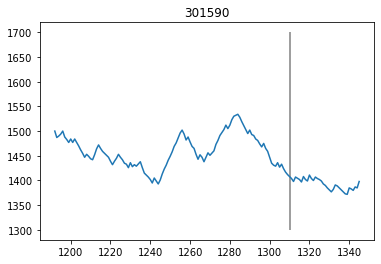

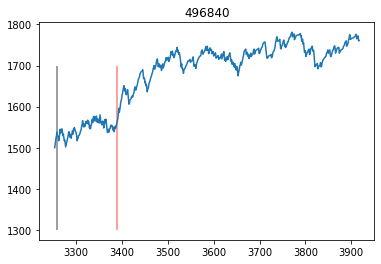

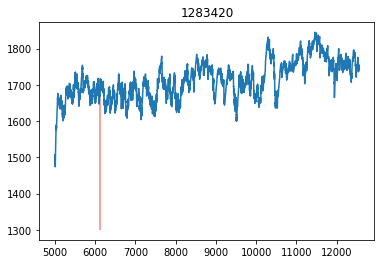

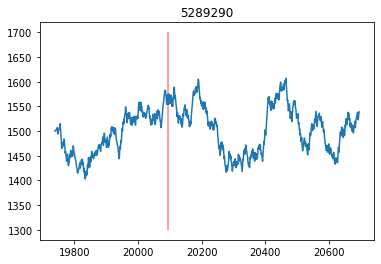

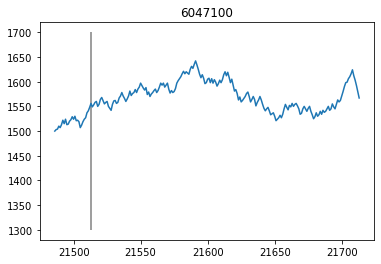

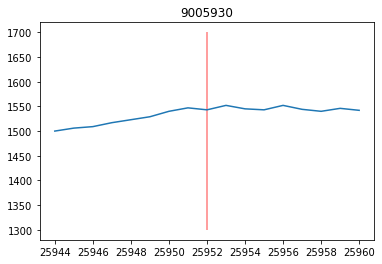

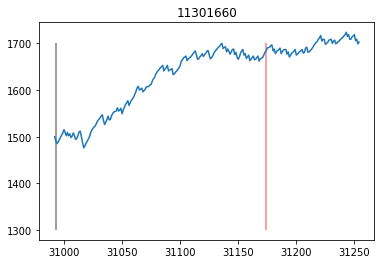

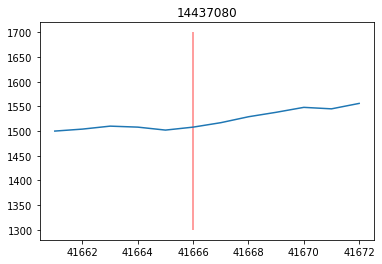

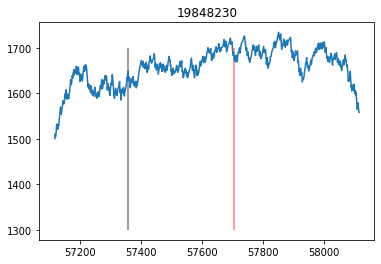

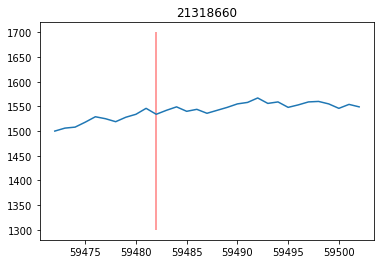

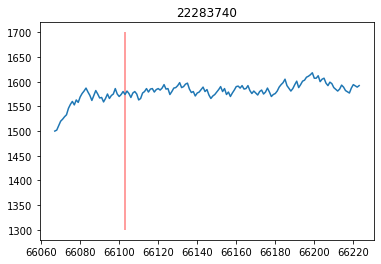

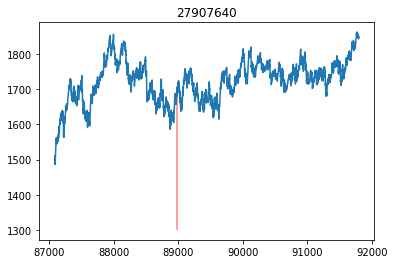

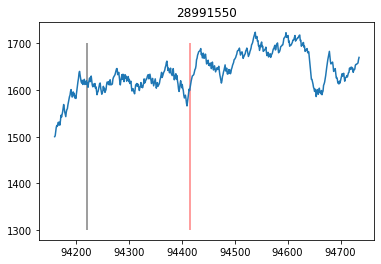

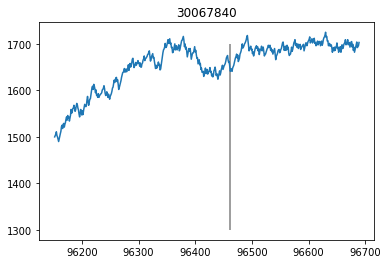

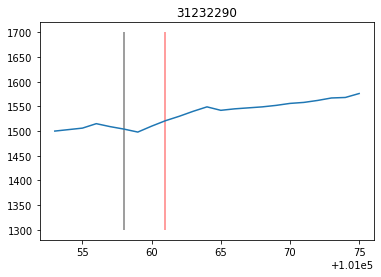

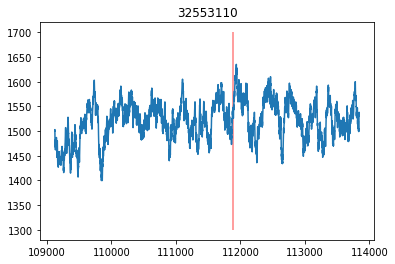

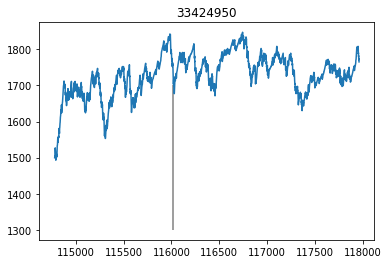

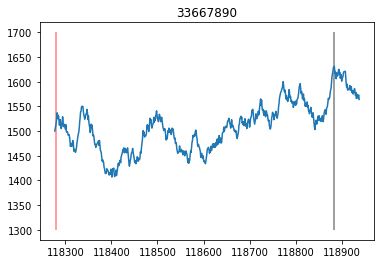

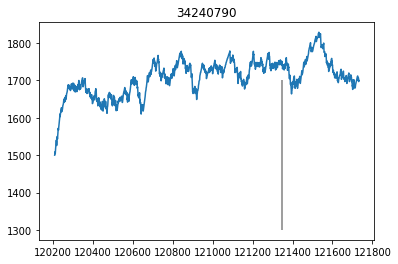

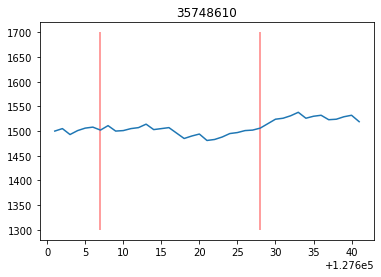

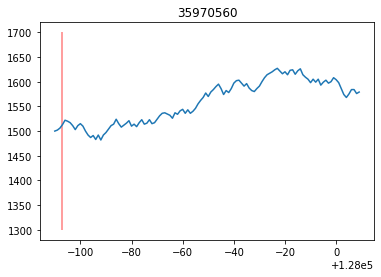

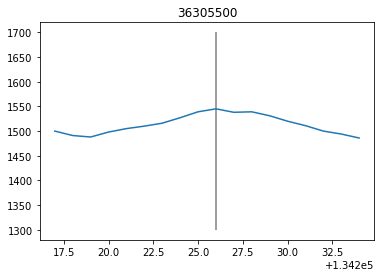

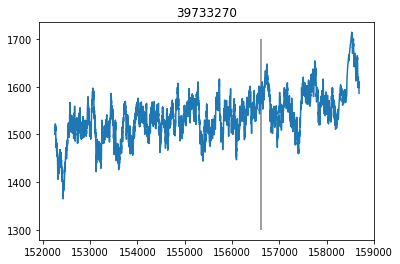

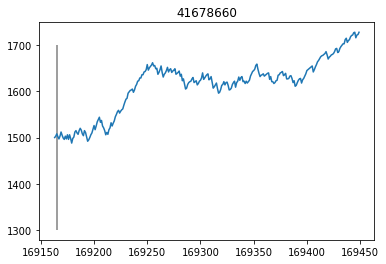

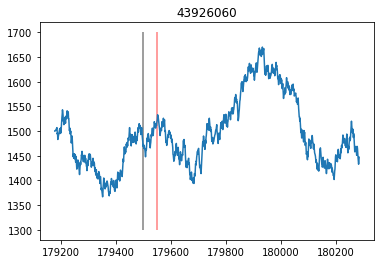

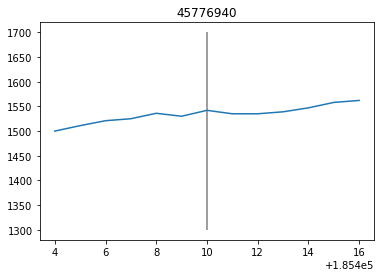

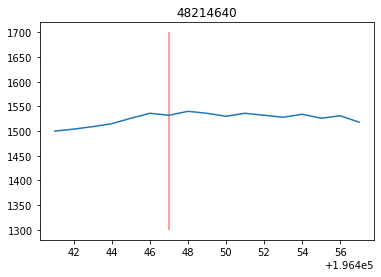

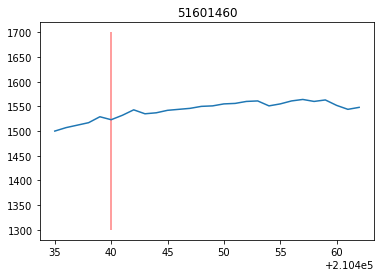

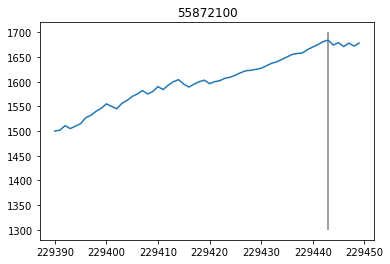

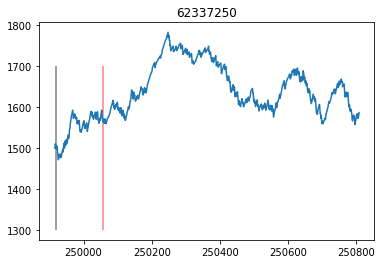

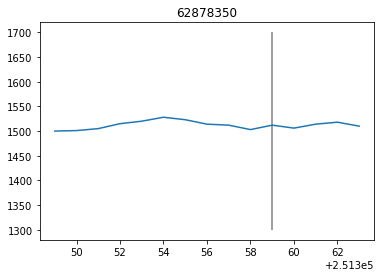

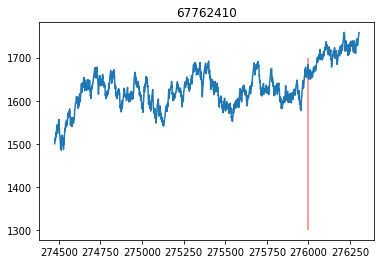

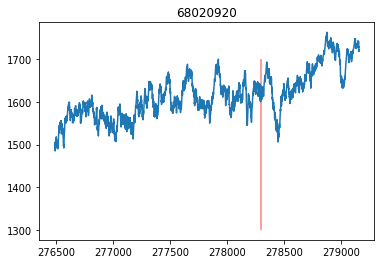

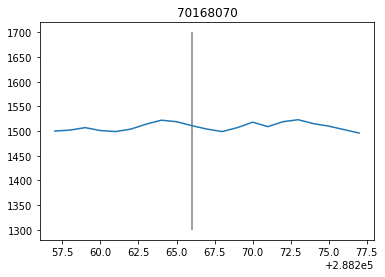

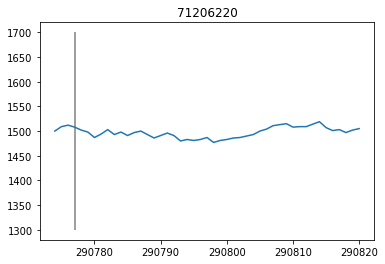

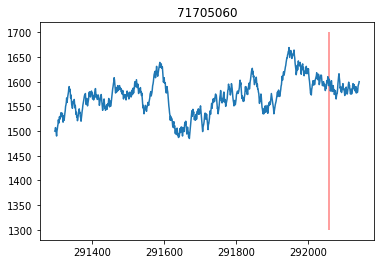

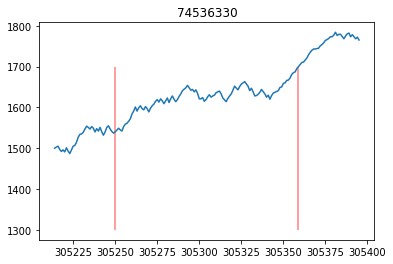

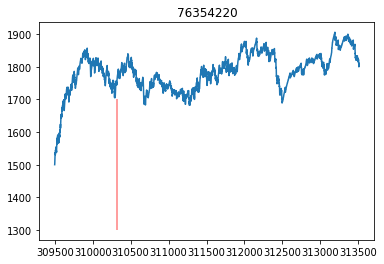

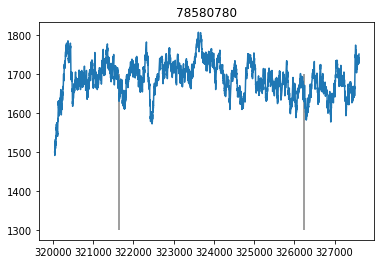

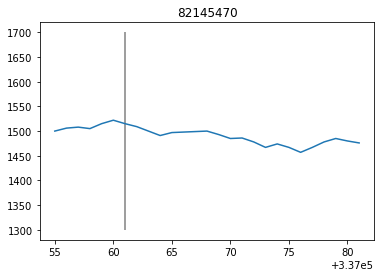

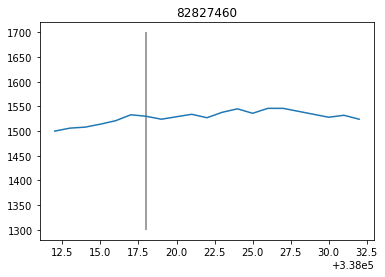

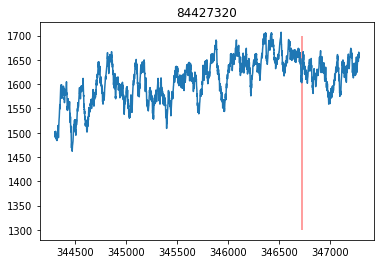

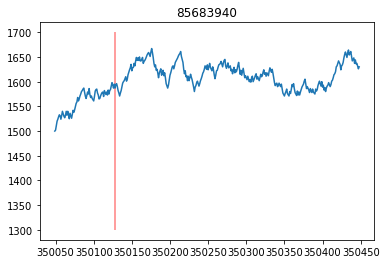

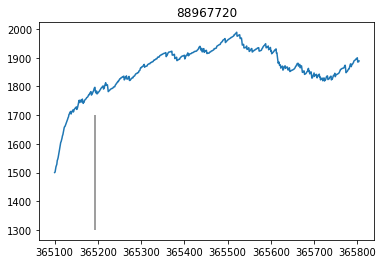

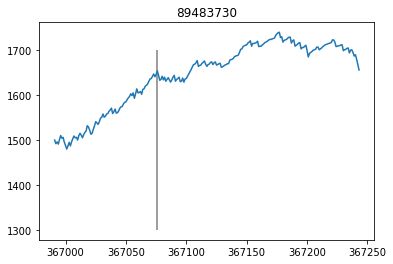

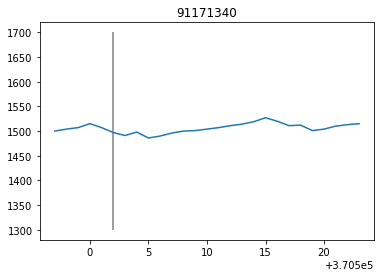

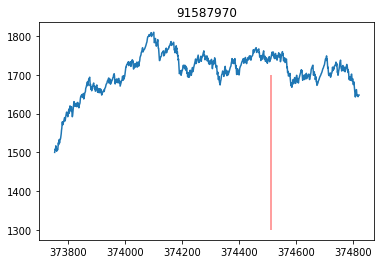

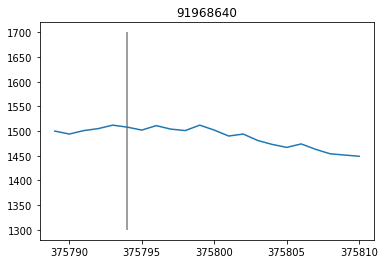

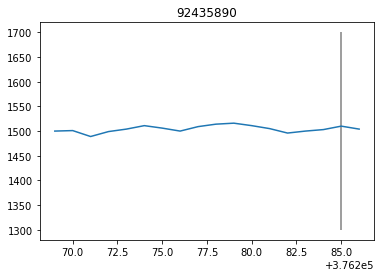

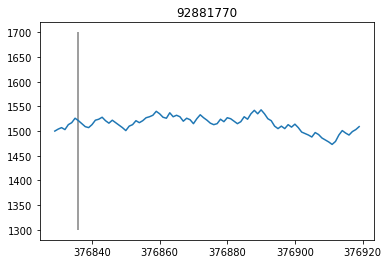

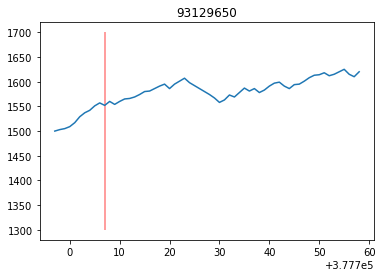

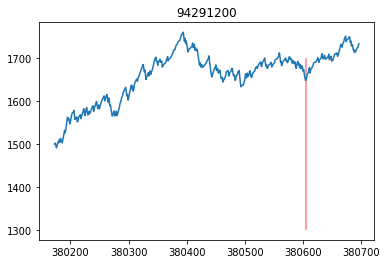

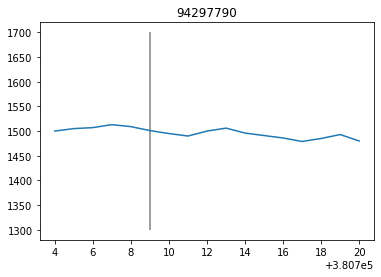

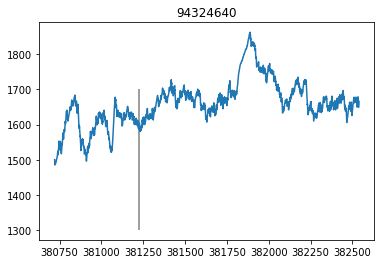

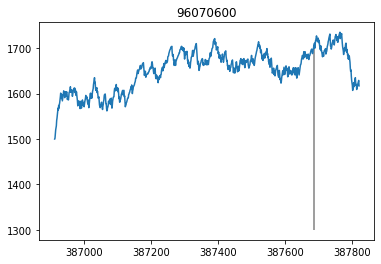

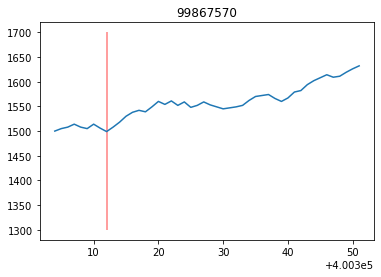

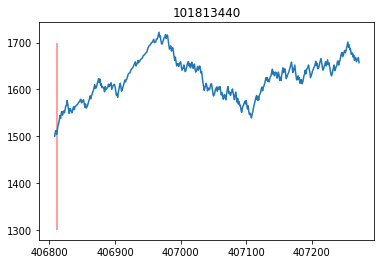

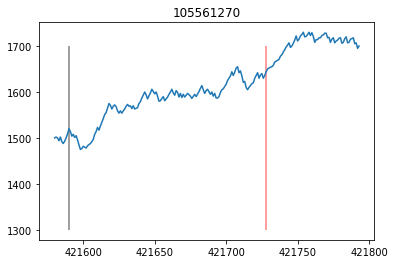

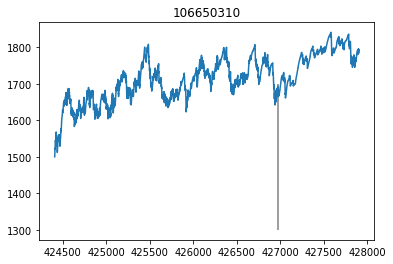

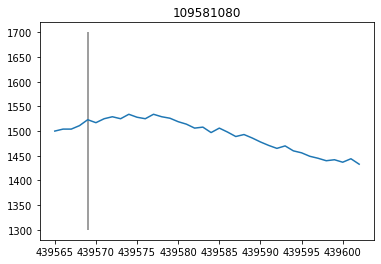

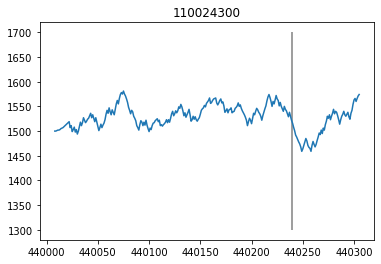

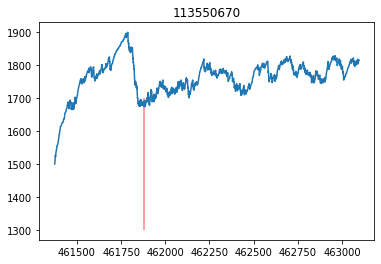

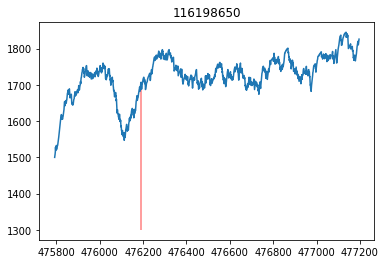

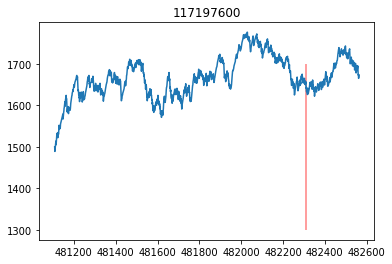

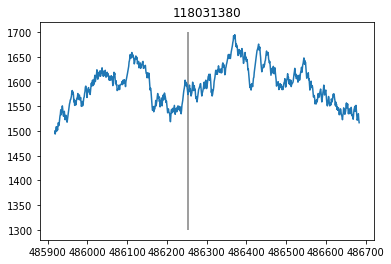

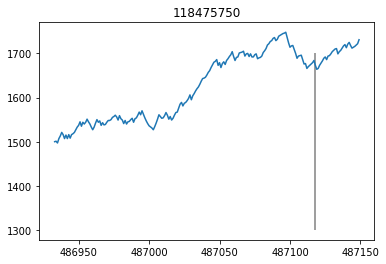

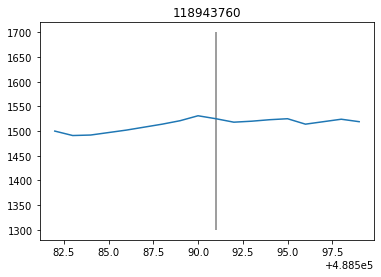

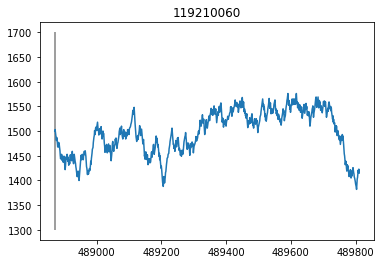

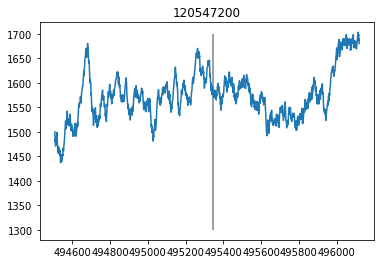

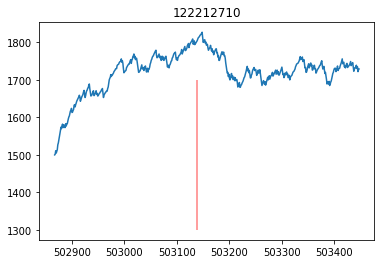

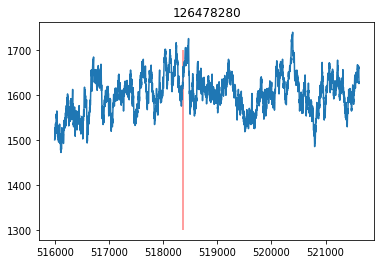

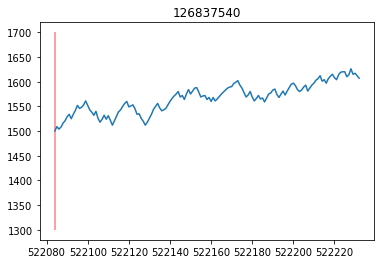

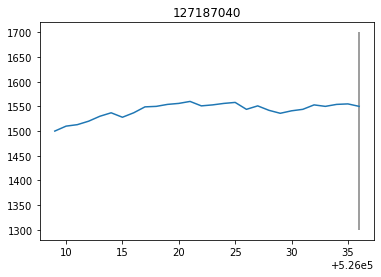

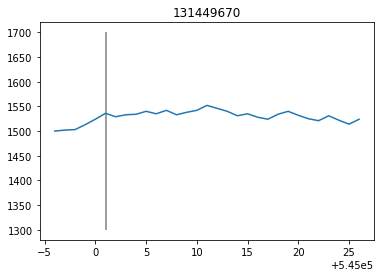

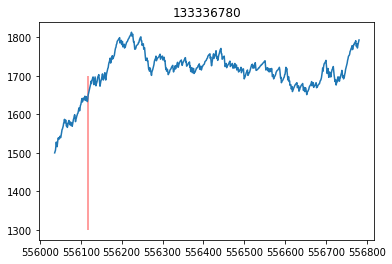

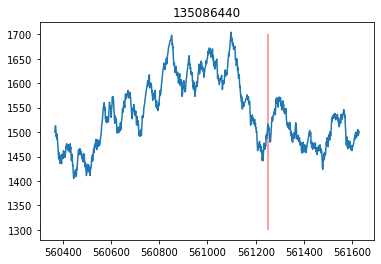

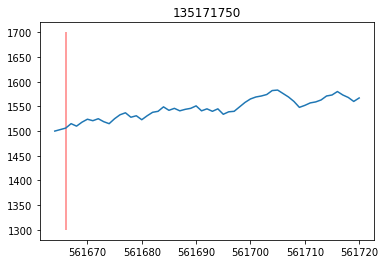

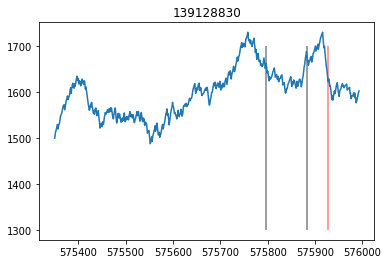

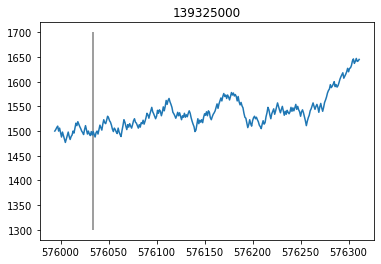

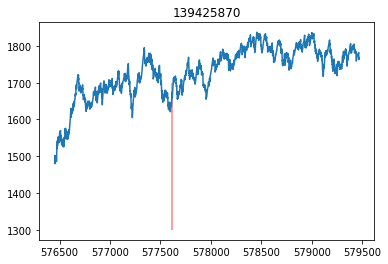

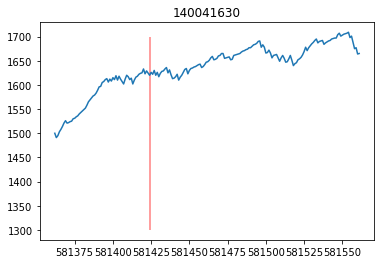

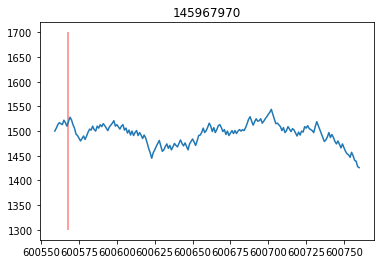

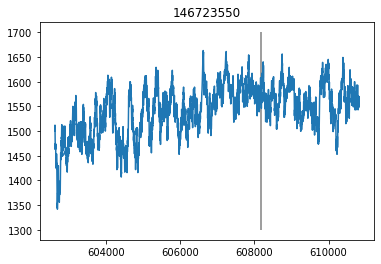

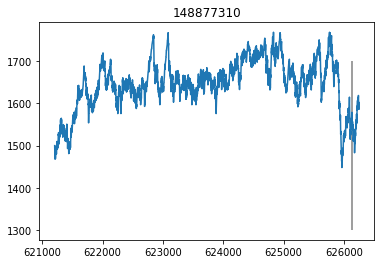

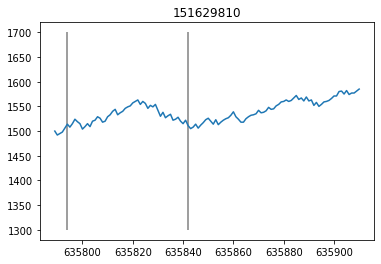

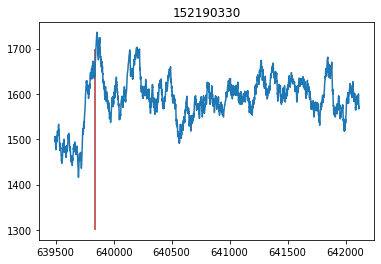

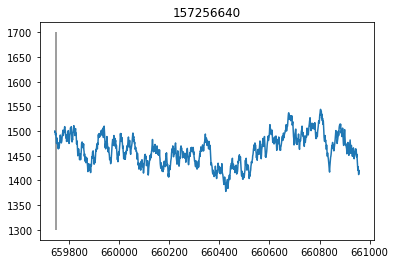

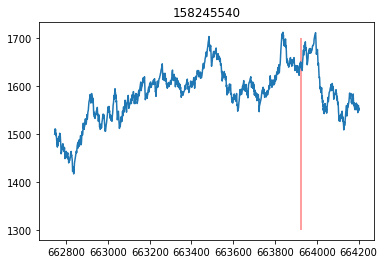

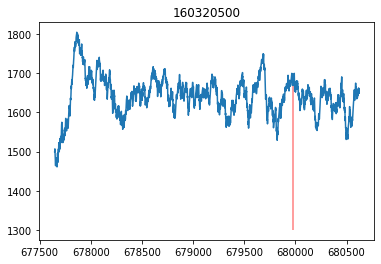

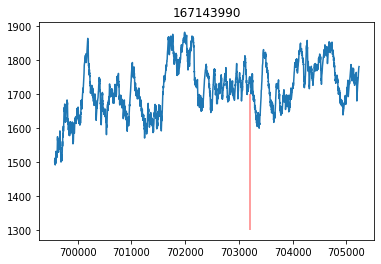

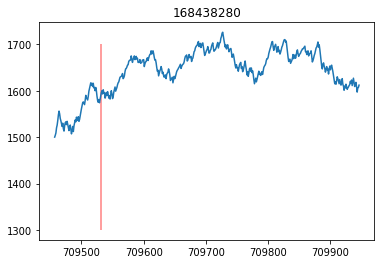

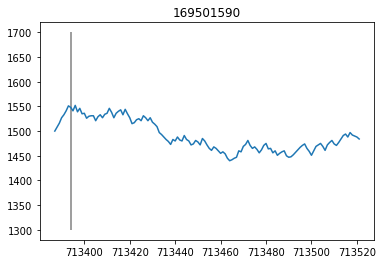

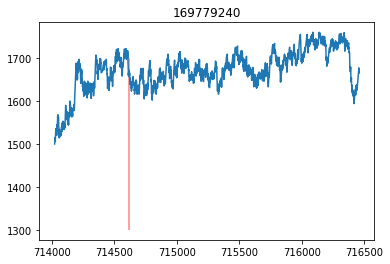

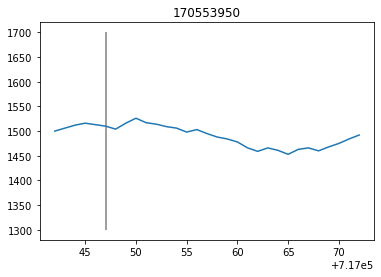

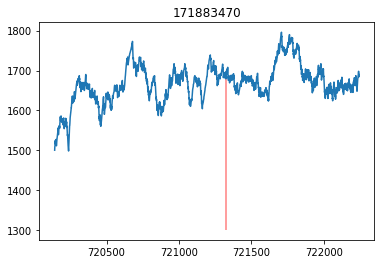

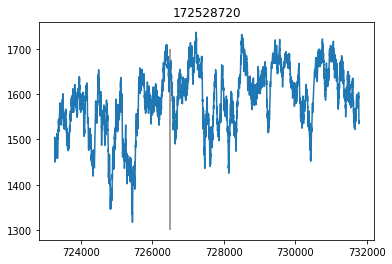

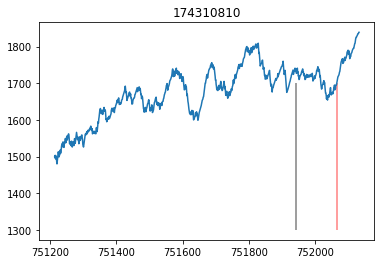

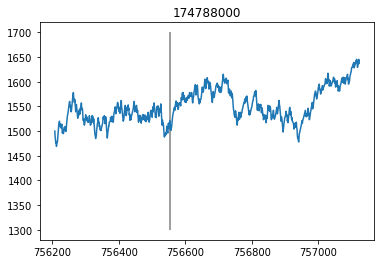

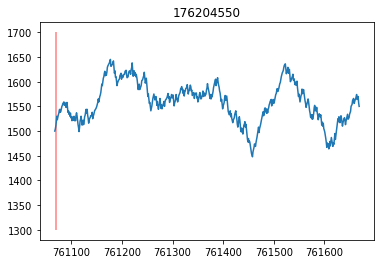

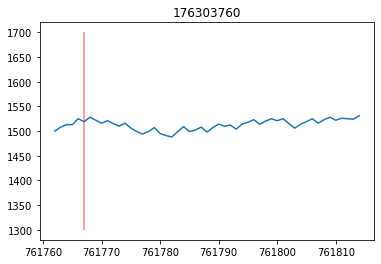

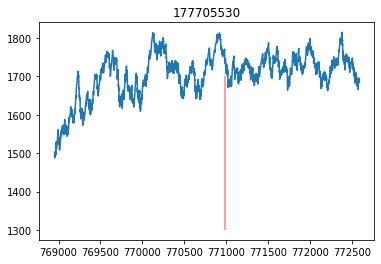

In [99]:
i = 0
for key, w_df in df2.groupby("user_id"):
    i += 1
    idxs = w_df[(w_df["user_id"] == key) & (w_df["content_id"] == 9315)].index
    anss = w_df[(w_df["user_id"] == key) & (w_df["content_id"] == 9315)]["answered_correctly"]
    
    w_df[w_df["content_type_id"] == 0]["user_id_rating"].plot()
    
    for idx, ans in zip(idxs, anss):
        if ans == 0:
            plt.vlines(idx, ymin=1300, ymax=1700, color="black", alpha=0.5)
        if ans == 1:
            plt.vlines(idx, ymin=1300, ymax=1700, color="red", alpha=0.5)            
    plt.title(key)
    plt.show()
    if i > 100:
        break

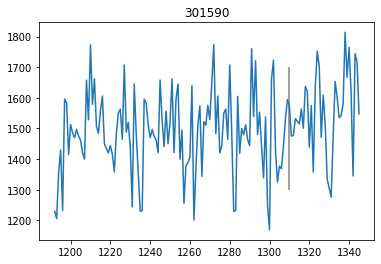

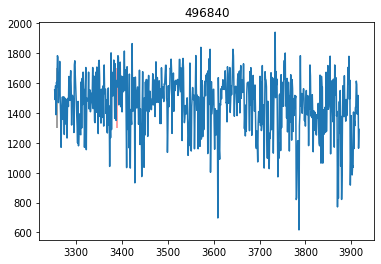

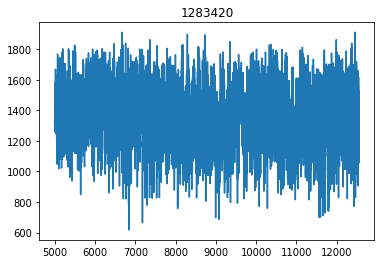

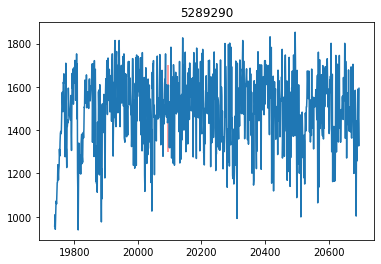

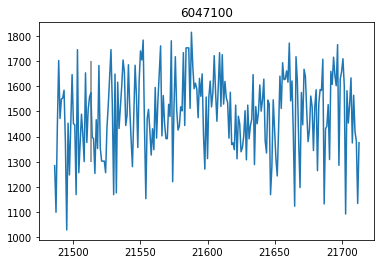

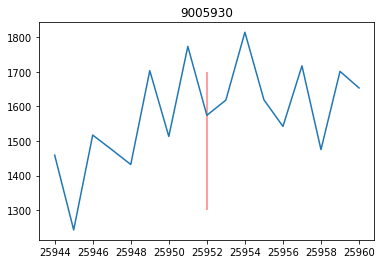

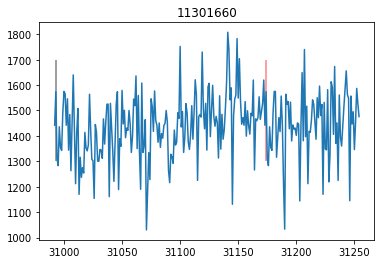

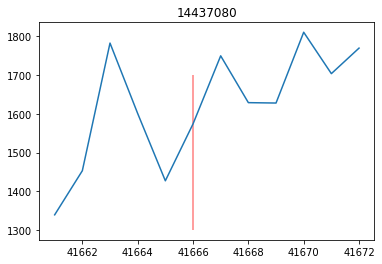

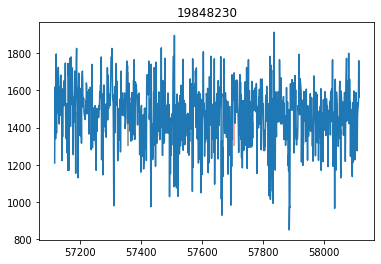

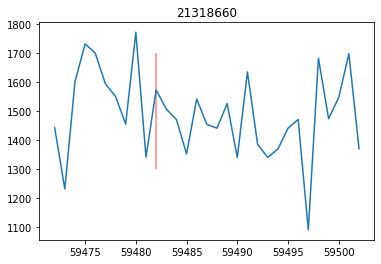

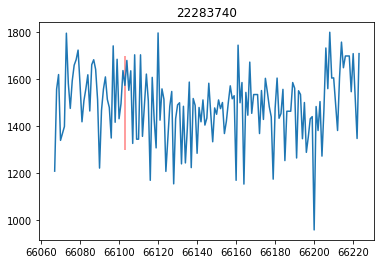

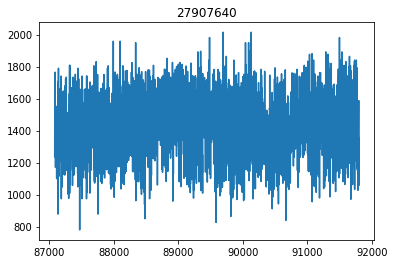

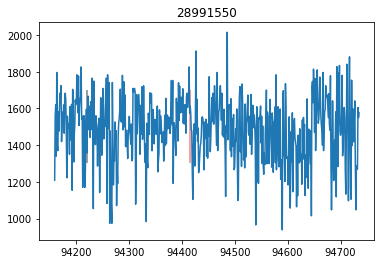

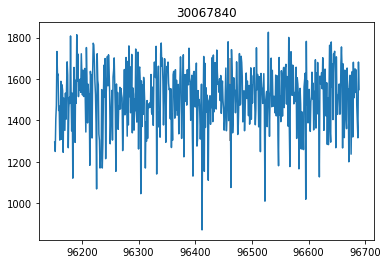

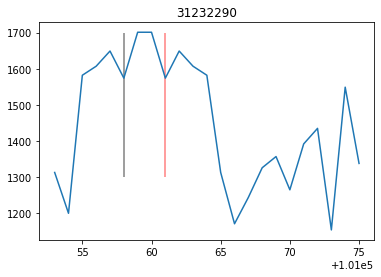

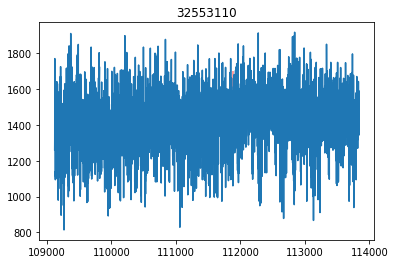

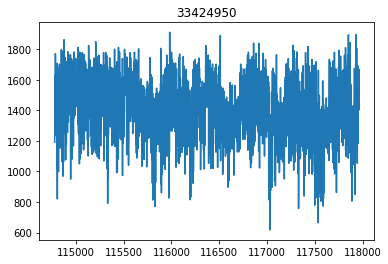

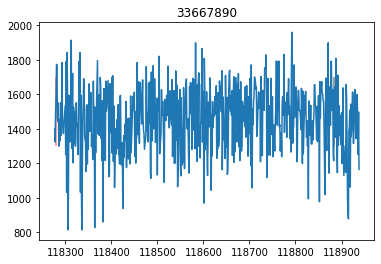

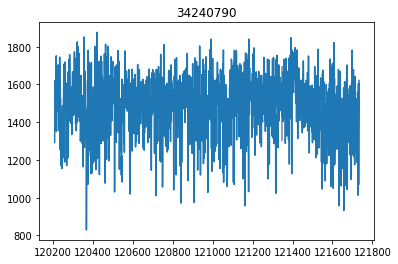

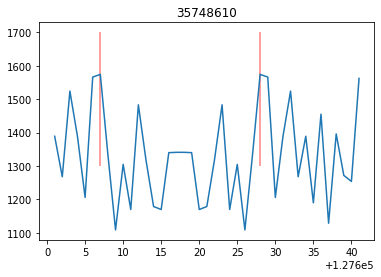

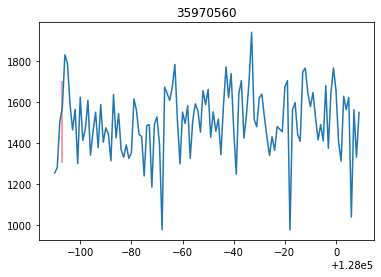

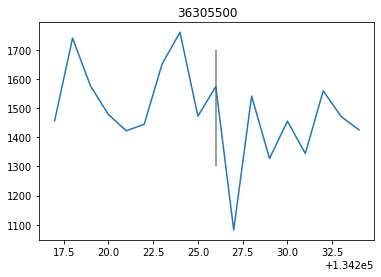

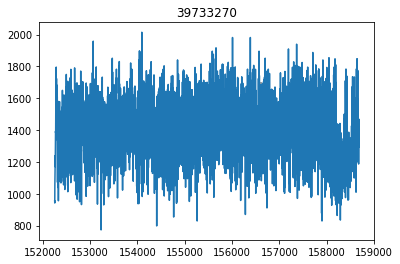

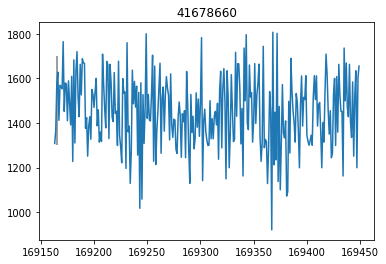

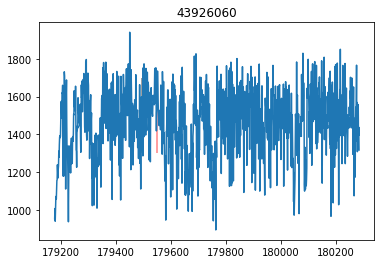

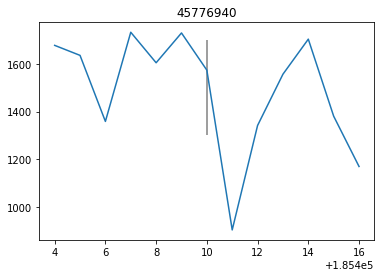

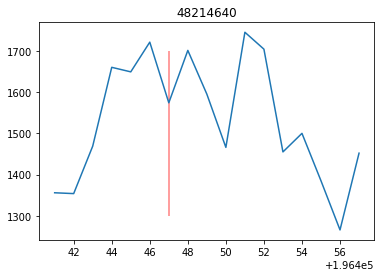

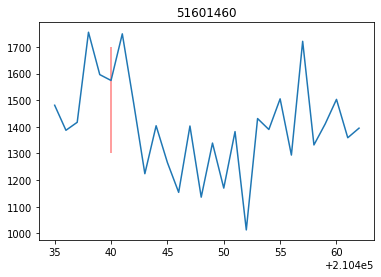

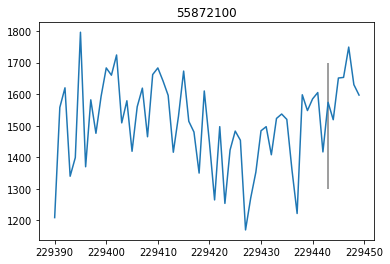

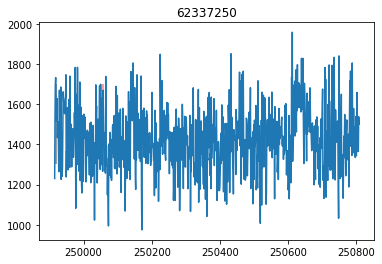

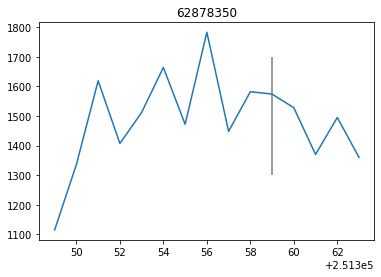

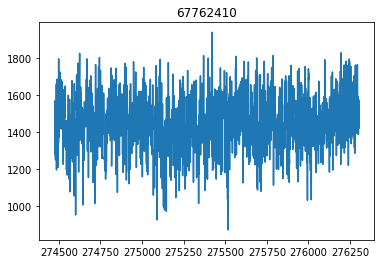

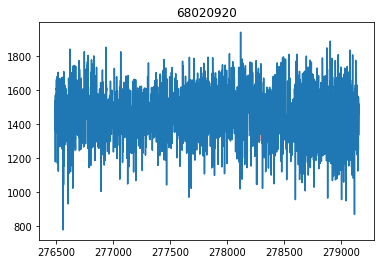

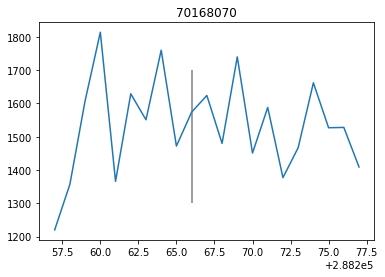

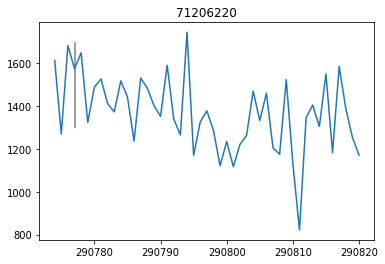

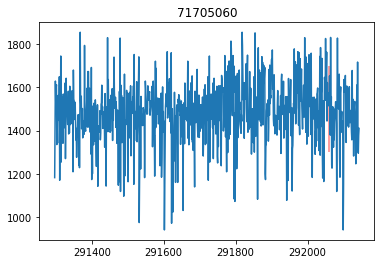

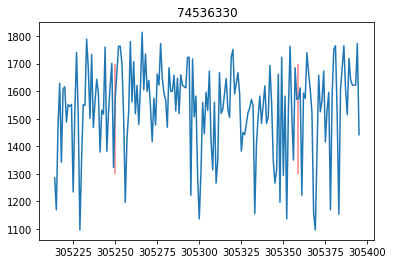

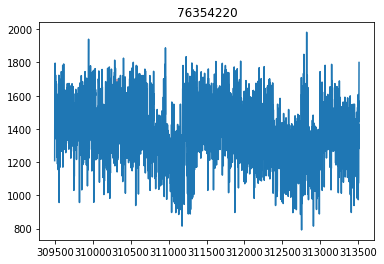

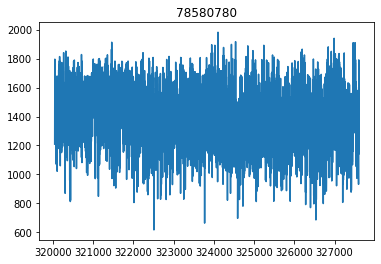

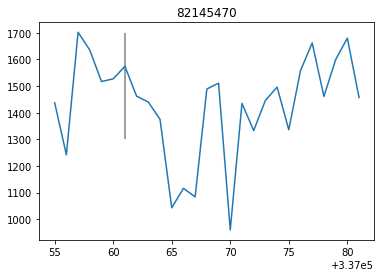

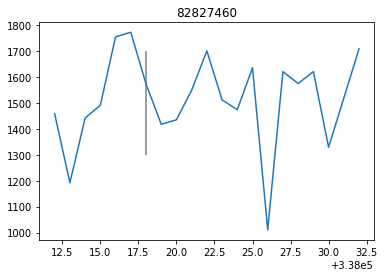

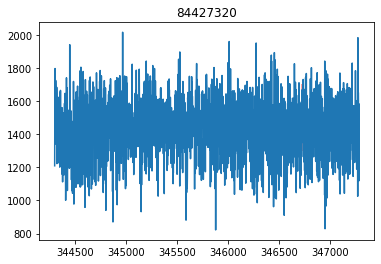

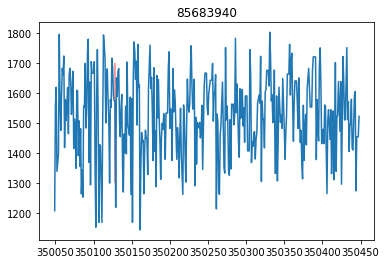

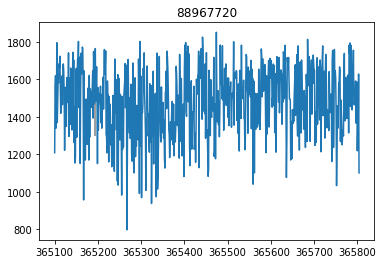

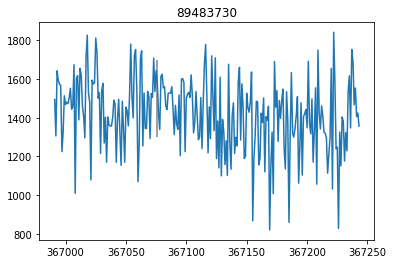

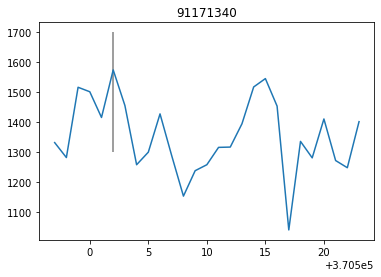

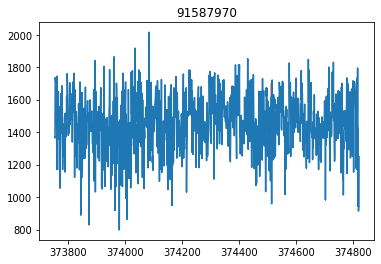

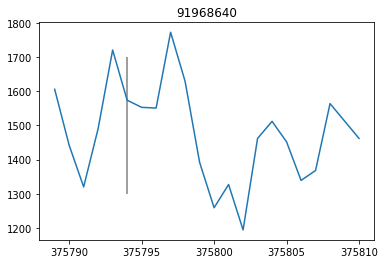

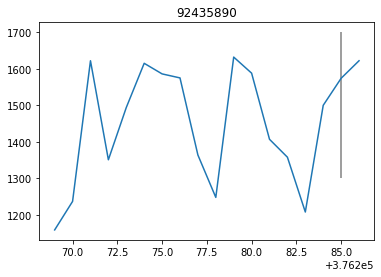

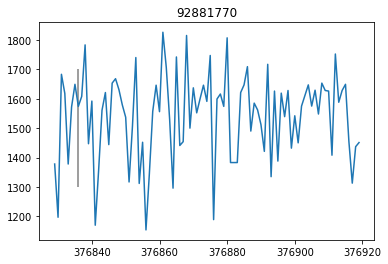

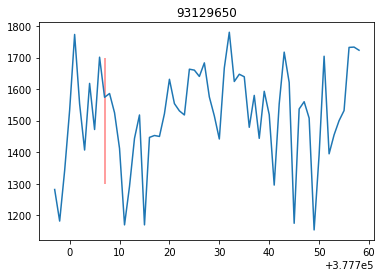

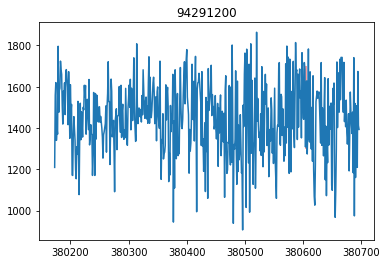

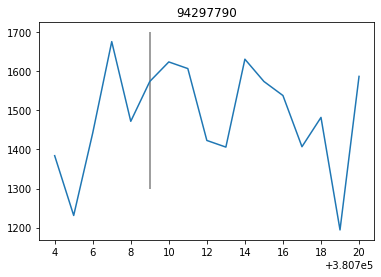

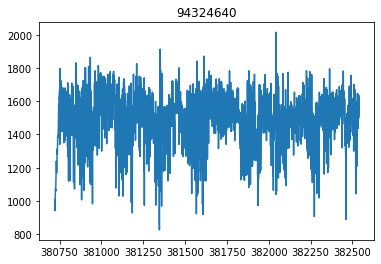

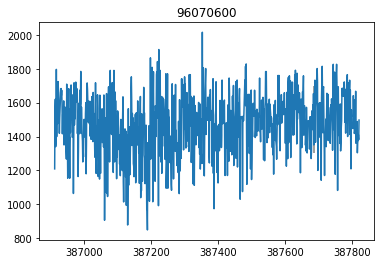

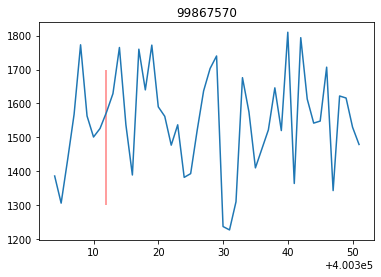

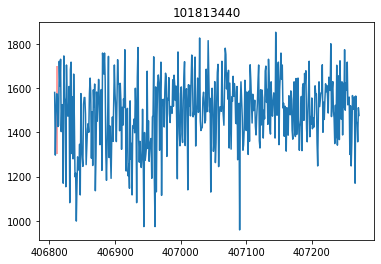

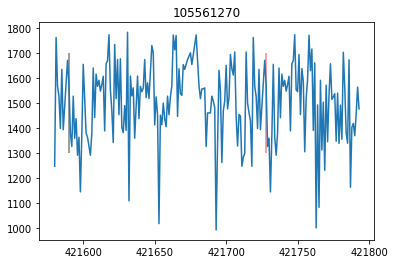

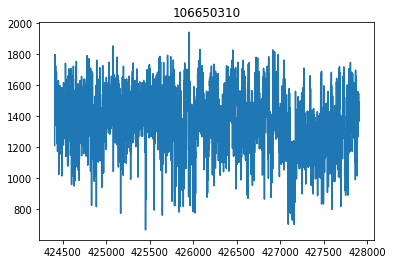

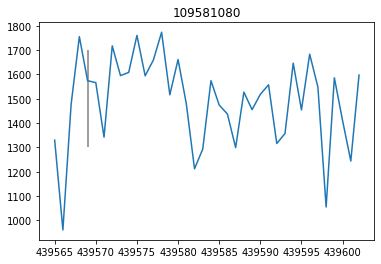

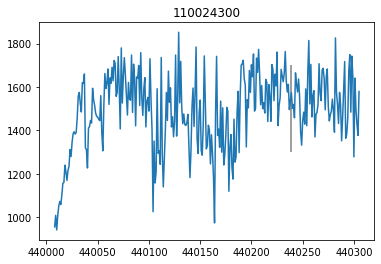

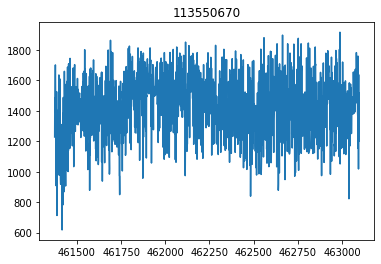

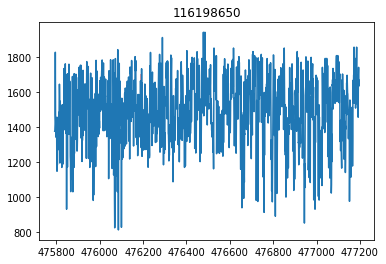

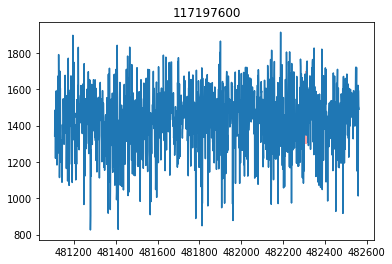

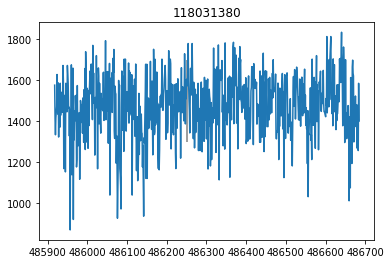

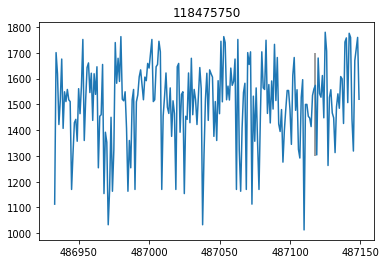

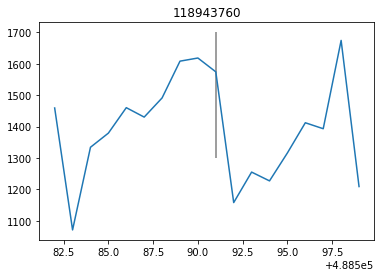

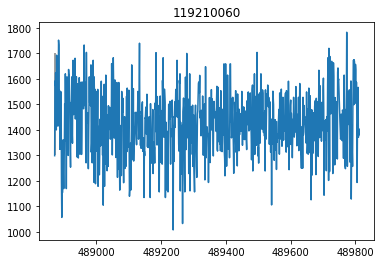

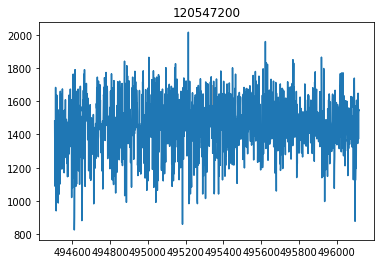

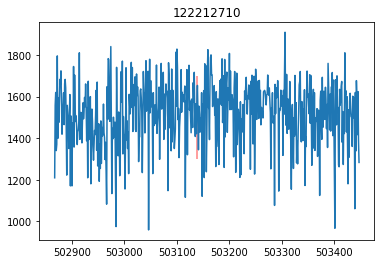

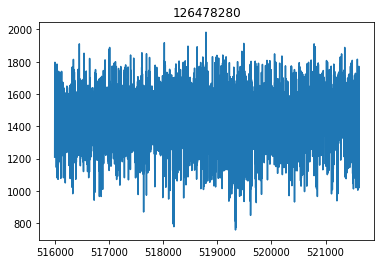

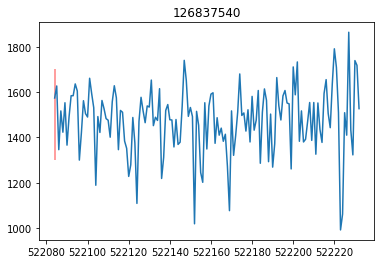

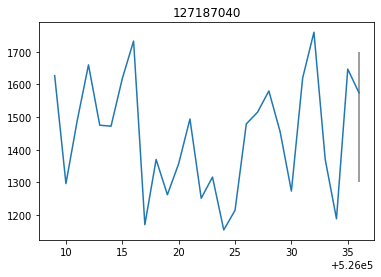

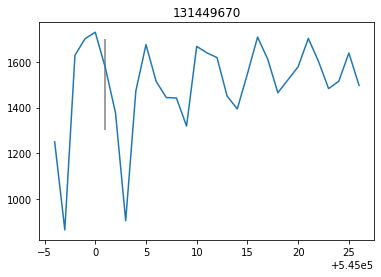

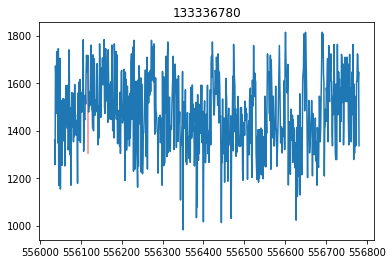

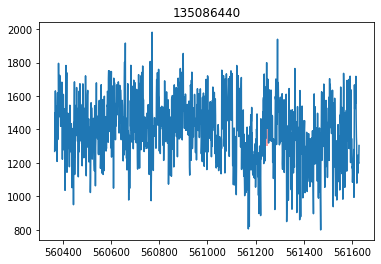

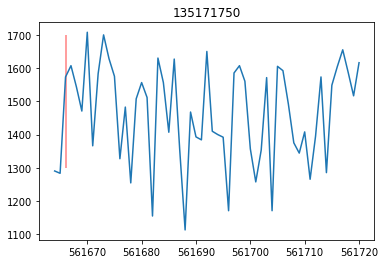

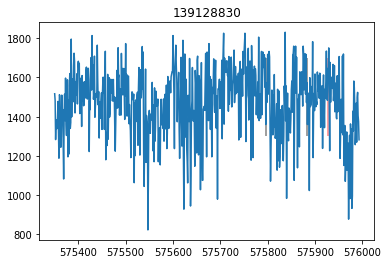

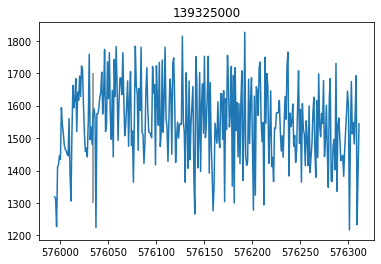

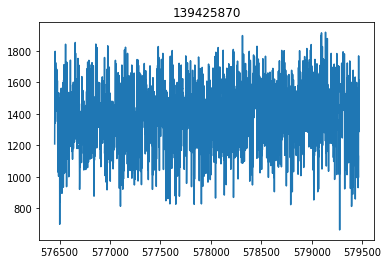

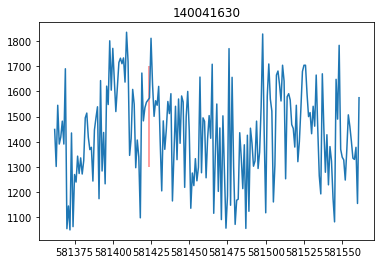

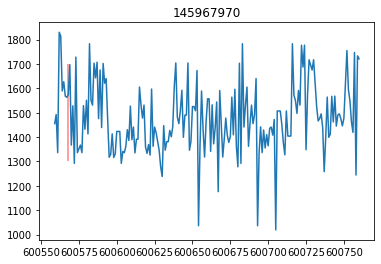

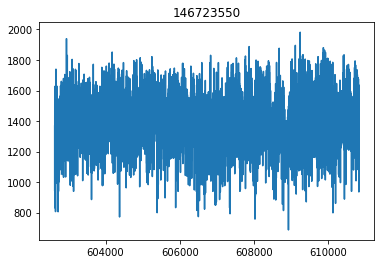

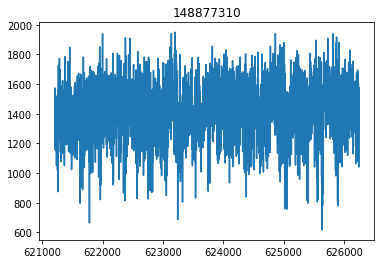

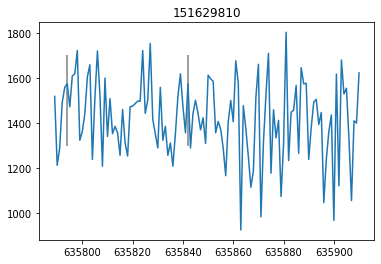

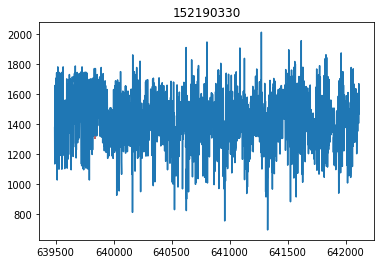

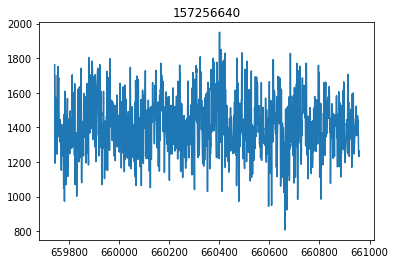

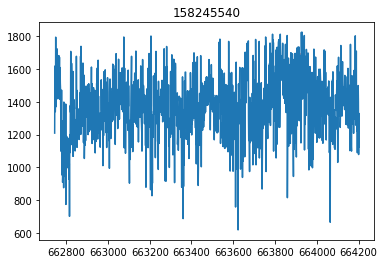

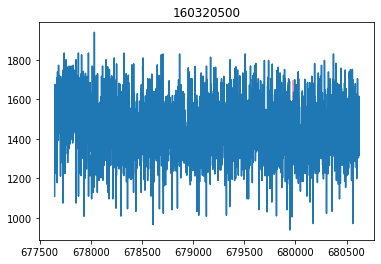

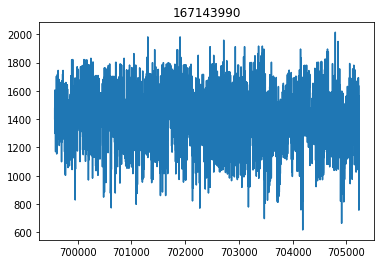

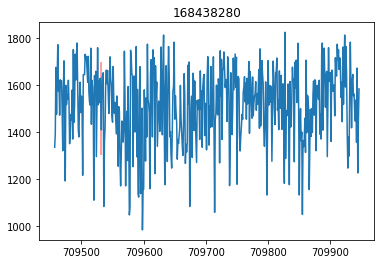

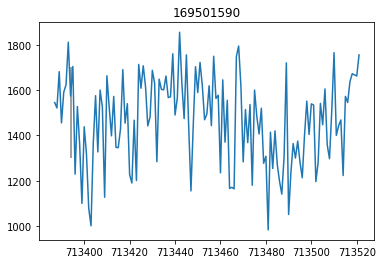

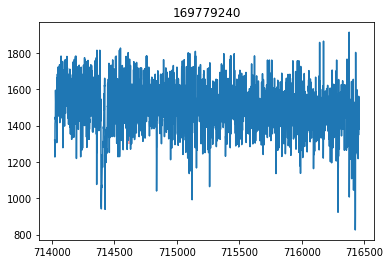

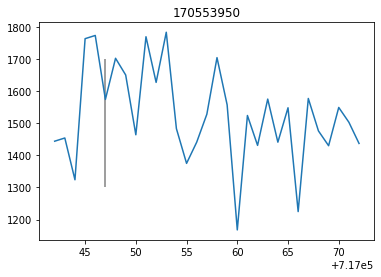

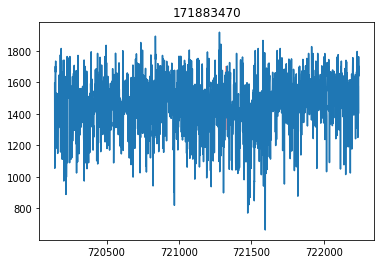

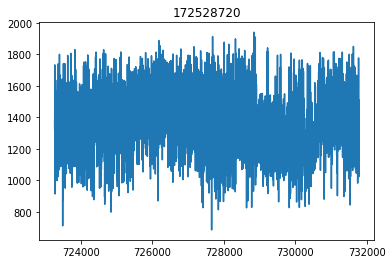

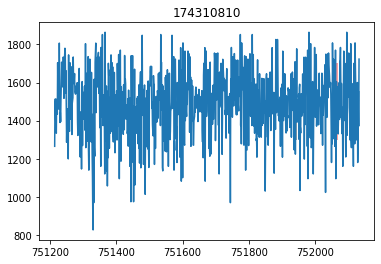

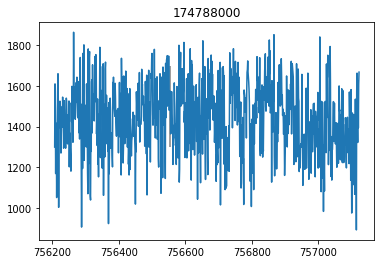

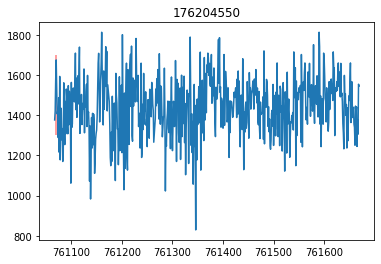

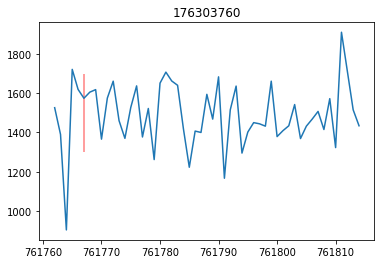

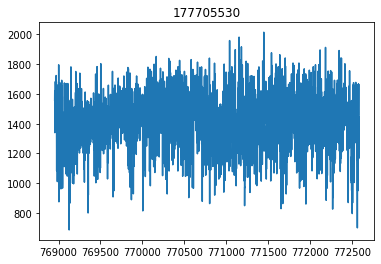

In [101]:
i = 0
for key, w_df in df2.groupby("user_id"):
    i += 1
    idxs = w_df[(w_df["user_id"] == key) & (w_df["content_id"] == 9315)].index
    anss = w_df[(w_df["user_id"] == key) & (w_df["content_id"] == 9315)]["answered_correctly"]
    
    w_df[w_df["content_type_id"] == 0]["content_rating"].plot()
    
    for idx, ans in zip(idxs, anss):
        if ans == 0:
            plt.vlines(idx, ymin=1300, ymax=1700, color="black", alpha=0.5)
        if ans == 1:
            plt.vlines(idx, ymin=1300, ymax=1700, color="red", alpha=0.5)            
    plt.title(key)
    plt.show()
    if i > 100:
        break

In [64]:
df2

timestamp     user_id  content_id  content_type_id  task_container_id  \
0      294126098      301590        9315                0                118   
1         127531      496840        9315                0                  5   
2      106290991      496840        9315                0                121   
3     3345697249     1283420        9315                0                777   
4      271901040     5289290        9315                0                333   
...          ...         ...         ...              ...                ...   
1486  2155912829  2137979150        9315                0                555   
1487   166788693  2138161120        9315                0                 35   
1488  4541648937  2138467650        9315                0                105   
1489      163731  2139420940        9315                0                  4   
1490   204200543  2139460140        9315                0                 52   

      user_answer  answered_correctly  prior_question_elapsed_time  \
0               0                   0                     121000.0   
1               0                   0                      29000.0   
2               3                   1                      35000.0   
3               3                   1                      12000.0   
4               3                   1                      38000.0   
...           ...                 ...                          ...   
1486            3                   1                      20000.0   
1487            0                   0                      71000.0   
1488            2                   0                      13000.0   
1489            2                   0                      32000.0   
1490            3                   1                       7000.0   

     prior_question_had_explanation  bundle_id  correct_answer  part tags  \
0                              True       9315               3     5   55   
1                             False       9315               3     5   55   
2                              True       9315               3     5   55   
3                              True       9315               3     5   55   
4                              True       9315               3     5   55   
...                             ...        ...             ...   ...  ...   
1486                           True       9315               3     5   55   
1487                           True       9315               3     5   55   
1488                           True       9315               3     5   55   
1489                          False       9315               3     5   55   
1490                           True       9315               3     5   55   

      tag type_of  user_id_rating  
0      -1     NaN            1408  
1      -1     NaN            1538  
2      -1     NaN            1566  
3      -1     NaN            1695  
4      -1     NaN            1554  
...   ...     ...             ...  
1486   -1     NaN            1759  
1487   -1     NaN            1516  
1488   -1     NaN            1507  
1489   -1     NaN            1514  
1490   -1     NaN            1654  

[1491 rows x 16 columns]